In [1]:
# Script générant une figure montrant des exemples de segmentation d'un nuage de points 2D au moyen d'un 
# classificateur SVM avec noyau RBF. 
#
# Le but est de produire une figure similaire à celle de alpaydin-ed2-fig13_5 mentionnée dans la présentation 
# Apprentissage supervisé pour la classification de Christian Gagné pour l'École en ligne en apprentissage automatique.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

In [2]:
# Partie I:  Génération des données

In [3]:
# Génération des données 2D constituées de deux cercles concentriques avec bruit. 

X, y = make_circles(n_samples=200,noise=0.2, factor=0.4, random_state=1)

# Normalisation des données
X = StandardScaler().fit_transform(X)

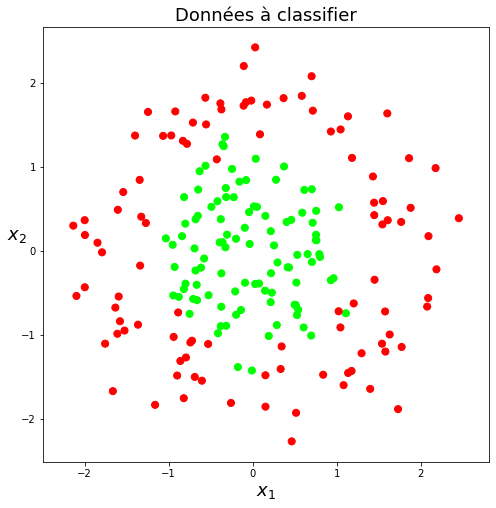

In [4]:
# Affichage de la distribution de L'ensemble des données.

# Colormap à deux couleurs
vals = np.array([[1,0,0,1],[0,1,0,1]])
newcmap = ListedColormap(vals)

fig = plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=newcmap)
ax = plt.gca()
ax.axis('equal')
ax.set_xlabel('$x_{1}$',fontsize=18)
ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
ax.set_title('Données à classifier',fontsize=18)

plt.show()

In [5]:
# Séparation des données en deux ensembles; un d'entrainement (50 %) et un de test (50 %).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)

In [6]:
# Partie II:  Détermination de la valeur optimale du paramètre C du classificateur SVM pour un noyau RBF de taille donnée. 

In [7]:
# À chaque noyau (kernel) est associée une taille définie par la valeur d'un paramètre gamma (ou sigma).
# Cela spécifie les propriétés du classificateur SVM avec ce noyau. De plus, une valeur du paramètre C 
# est aussi associée à ce classificateur SVM. Dans cet exemple, pour une valeur de gamma donnée, on va  
# estimer la valeur de C maximisant les performances du classificateur correspondant. Cela sera fait 
# pour trois différentes valeurs de gamma.

# Valeurs de gamma et de sigma^2 utilisées dans les kernels RBF
sigma2 = np.array([10, 3, .3])
gamma  = 1./sigma2

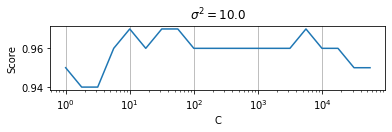

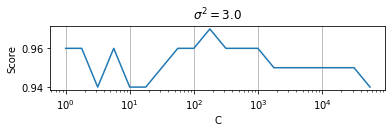

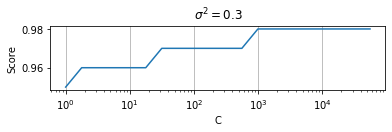

In [8]:
# Pour chaque valeur de gamma, on doit déterminer la valeur du paramètre C du classificater SVM qui 
# maximise les performances en classification. On utilise une grille logarithmique de valeurs de C.

C = np.logspace(0,5,20, endpoint=False)
c_best = []
score_best = []

G = len(gamma)

for k in range(G):
    score = []
    for c in C:
        # Entraine le modèle avec l'ensemble d'entrainement
        model = SVC(kernel='rbf',gamma=gamma[k], C=c)    
        clf = model.fit(X_train, y_train)

        # Évalue les performances avec l'ensemble de test
        score.append(clf.score(X_test, y_test))
    
    # Valeur optimale de C
    val = max(score)
    indx = score.index(val)
    c_best.append(C[indx])
    score_best.append(val)

    ax = plt.subplot(G,1,k+1)
    ax.plot(C, score)
    ax.set(xlabel='C', ylabel='Score')
    ax.set_xscale('log')
    ax.xaxis.grid(True, which='major')
    ax.set_title('$\sigma^2=$'+str(sigma2[k]))
    plt.show()
    


In [9]:
# Affiche les valeurs optimales du paramètre C

from IPython.display import display, Math

for k in range(G):
    display(Math(r'\\sigma^2 = %.2f   \;\;\;\;   C_{opt} = %.1f   \;\;\;\;   score = %.2f' % (sigma2[k],c_best[k],score_best[k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Partie III:  Affichage des résultats de classification

In [11]:
# Fonction d'affichage de la marge SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # Affiche la marge qui est définie selon h(X) = {-1, 0, +1}  
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Génère grille ou h(X) est échantillonnée
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Affiche contours de h(X) définissant la marge
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affiche vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolors='k');        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

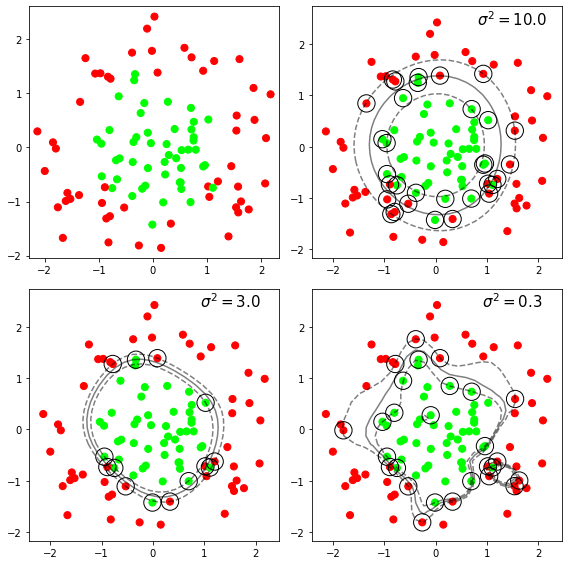

In [12]:
# Affichage des résultats de classifications optimales pour les 3 valeurs de sigma^2.
# Seules les données de l'ensemble d'entrainement sont affichées.

# Colormap à deux couleurs
vals = np.array([[1,0,0,1],[0,1,0,1]])
newcmap = ListedColormap(vals)

# Affiche données à classifier
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(2,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=newcmap)
ax = plt.gca()
ax.axis('equal')

    
for k in range(G):
    # Entraine le modèle avec l'ensemble d'entrainement et la valeur optimale de C
    model = SVC(kernel='rbf',gamma=gamma[k], C=c_best[k])
    clf = model.fit(X_train, y_train)

    ax = plt.subplot(2,2,k+2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=newcmap)
    plot_svc_decision_function(clf)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
    ax.axis('equal')
    ax.text(1.5,2.5, '$\sigma^2=$'+str(sigma2[k]), ha="center", va="center", size=15)

plt.tight_layout()
plt.savefig('SVM_RBF_p63.svg', format='svg')
plt.show()